In [1]:
loc=((19.0760,72.8777))
dis=500

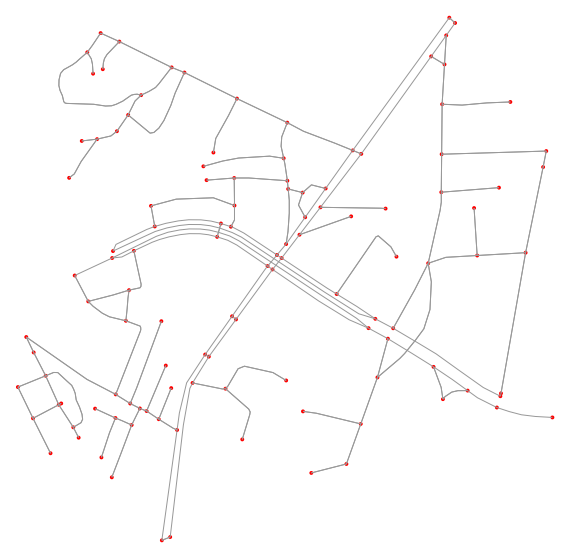

[83, 3, 3, 82, 6, 9, 43, 21, 29, 52, 7, 107, 31, 99, 86, 21, 27, 82, 38, 7, 73, 109, 15, 103, 66, 12, 3, 67, 34, 110, 32, 25, 94, 42, 114, 24, 52, 60, 70, 83, 113, 43, 41, 105, 107, 39, 65, 34, 20, 35]
[28373, 12909, 8953, 32016, 39942, 19244, 19620, 1598, 18914, 23268, 26629, 5073, 32575, 15638, 37007, 34391, 95, 35834, 12144, 26712, 31809, 22279, 38468, 4909, 8343, 7698, 504, 8656, 38228, 10707, 18124, 38343, 454, 24016, 315, 33599, 20715, 5384, 25185, 26514, 13390, 18054, 1440, 26468, 23429, 11590, 25804, 23376, 31378, 30265]


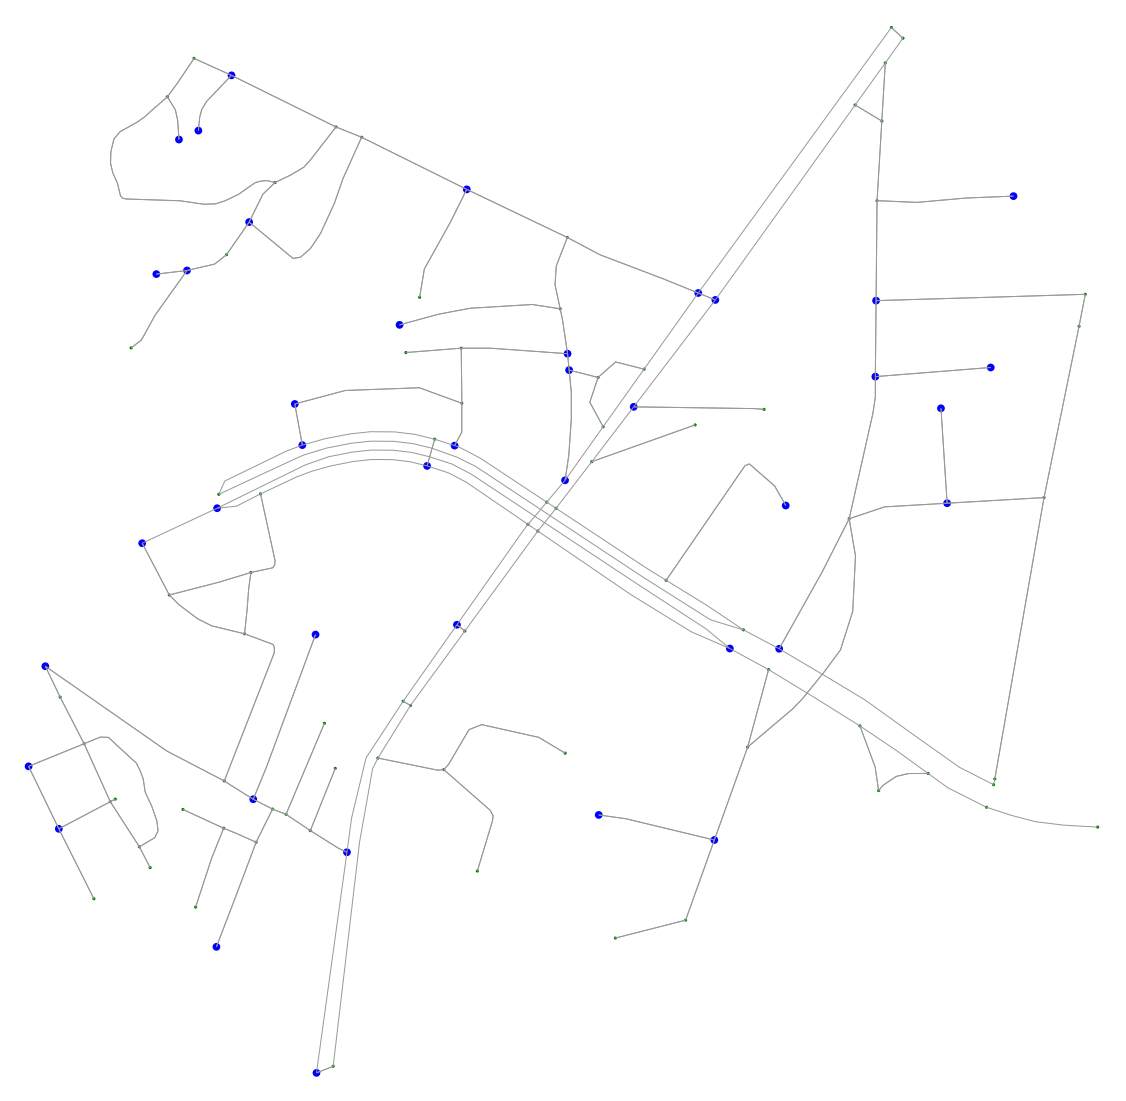

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import folium

graph=ox.graph_from_point(loc, distance=dis,network_type='drive')
ox.plot_graph(graph,node_color='r', fig_height=10, fig_width=10)
graph_proj = ox.project_graph(graph)
nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
node,edge=ox.graph_to_gdfs(graph, nodes=True, edges=True)
#print(nodes.head())
#print(type(nodes))
B=pd.Series.tolist(nodes.osmid)
C=pd.Series.tolist(nodes.y)
D=pd.Series.tolist(nodes.x)
C1=pd.Series.tolist(node.y)
D1=pd.Series.tolist(node.x)
#print(C1)
#print(len(B))
#print(B)

A = nx.adjacency_matrix(graph,weight='length')
#print(len(graph))
#print(A)
#print(type(A))
#print(type(A.todense()))
np.savetxt("foo.csv", A.todense(), delimiter=",")
Ac=A.tocoo()
#print(type(Ac))

#print(type(Ac.data))

list_cs=[]
for count in range(0,50):
    list_cs.append(random.randrange(0,len(graph)));
print(list_cs)

list_cs_wt=[]
for count in range(0,50):
    list_cs_wt.append(random.randrange(0,40000));
print(list_cs_wt)

my_file = open('graph.txt', 'w+')

for i in range (0,50):
     my_file.write("%d " %list_cs[i])  
     my_file.write("%d \n" %list_cs_wt[i]) 
    
nc=['g' for node in B]
ns=[10 for node in B]
for i in list_cs:
    nc[i]='b'
    ns[i]=60
ox.plot_graph(graph,node_color=nc,node_size=ns,fig_height=20, fig_width=20)    

m1 = ox.plot_graph_folium(graph,edge_width=1)
for j in range (0,len(graph)):
    k=j
    o=(C1[k],D1[k])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='black'), tooltip='Click Me!').add_to(m1)
for j in range (0,len(list_cs)):
    k=list_cs[j]
    o=(C1[k],D1[k])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='red'), tooltip='Click Me!').add_to(m1)
ja='0';
ja+=".html"
m1.save(ja)   

list1=Ac.data
list2=Ac.row
list3=Ac.col

my_file.write("%s \n" %len(list1))
for i in range(len(list1)):
    my_file.write("%d " %list2[i])  
    my_file.write("%d " %list3[i])  
    my_file.write("%d \n" %list1[i]) 

my_file.close()

In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

my_file = open('input.txt', 'w+')
a=int(input("Enter source: "))
b=int(input("Enter destination: "))
my_file.write("%d " %a);
my_file.write("%d \n" %b);
my_file.write("\n")
c=int(input("Enter number of unavailable nodes: "))
print("Enter details of nodes: ")
my_file.write("%d \n" %c)
for i in range (0,c):
    a=int(input())
    my_file.write("%d " %a)
my_file.write("\n")
d=int(input("Available Charge: "))
e=int(input("Full charge Capacity: "))
my_file.write("%d " %d)
my_file.write("%d \n" %e)
my_file.close()

Enter source: 74
Enter destination: 77
Enter number of unavailable nodes: 0
Enter details of nodes: 
Available Charge: 30
Full charge Capacity: 1000


In [4]:
data = data2 = "" 

with open('graph.txt') as fp: 
    data = fp.read() 

with open('input.txt') as fp: 
    data2 = fp.read() 

data += "\n"
data += data2 
  
with open ('final_input.txt','w') as fp: 
    fp.write(data) 
fp.close()

In [5]:
with open('final_input.txt','r') as f:
    print(f.read())

83 28373 
3 12909 
3 8953 
82 32016 
6 39942 
9 19244 
43 19620 
21 1598 
29 18914 
52 23268 
7 26629 
107 5073 
31 32575 
99 15638 
86 37007 
21 34391 
27 95 
82 35834 
38 12144 
7 26712 
73 31809 
109 22279 
15 38468 
103 4909 
66 8343 
12 7698 
3 504 
67 8656 
34 38228 
110 10707 
32 18124 
25 38343 
94 454 
42 24016 
114 315 
24 33599 
52 20715 
60 5384 
70 25185 
83 26514 
113 13390 
43 18054 
41 1440 
105 26468 
107 23429 
39 11590 
65 25804 
34 23376 
20 31378 
35 30265 
242 
0 6 154 
0 73 39 
0 116 49 
1 60 86 
2 43 84 
2 111 7 
3 90 52 
4 5 26 
4 86 105 
5 26 10 
5 99 25 
6 0 154 
6 9 37 
7 10 295 
7 91 128 
7 110 16 
8 9 90 
8 53 527 
9 6 37 
9 106 121 
10 84 14 
11 7 84 
11 13 47 
12 33 30 
12 68 191 
13 11 47 
13 14 48 
13 15 26 
14 11 63 
14 13 48 
15 13 26 
15 94 14 
15 99 99 
16 17 98 
16 26 52 
17 16 98 
18 56 21 
19 57 60 
20 40 228 
20 101 132 
21 23 40 
22 78 112 
23 21 40 
23 74 42 
23 75 260 
24 29 60 
25 27 106 
26 76 26 
26 98 118 
27 25 106 
27 47 76 
27 112 88 

In [6]:
!g++ main_algo.cpp -o run

In [7]:
!run<final_input.txt

In [8]:
with open('output.txt','r') as f:
    print(f.read())

74 77
74 29 92 55 -83 91 7 10 84 77
74 23 -21 23 74 29 92 55 83 91 7 10 84 77



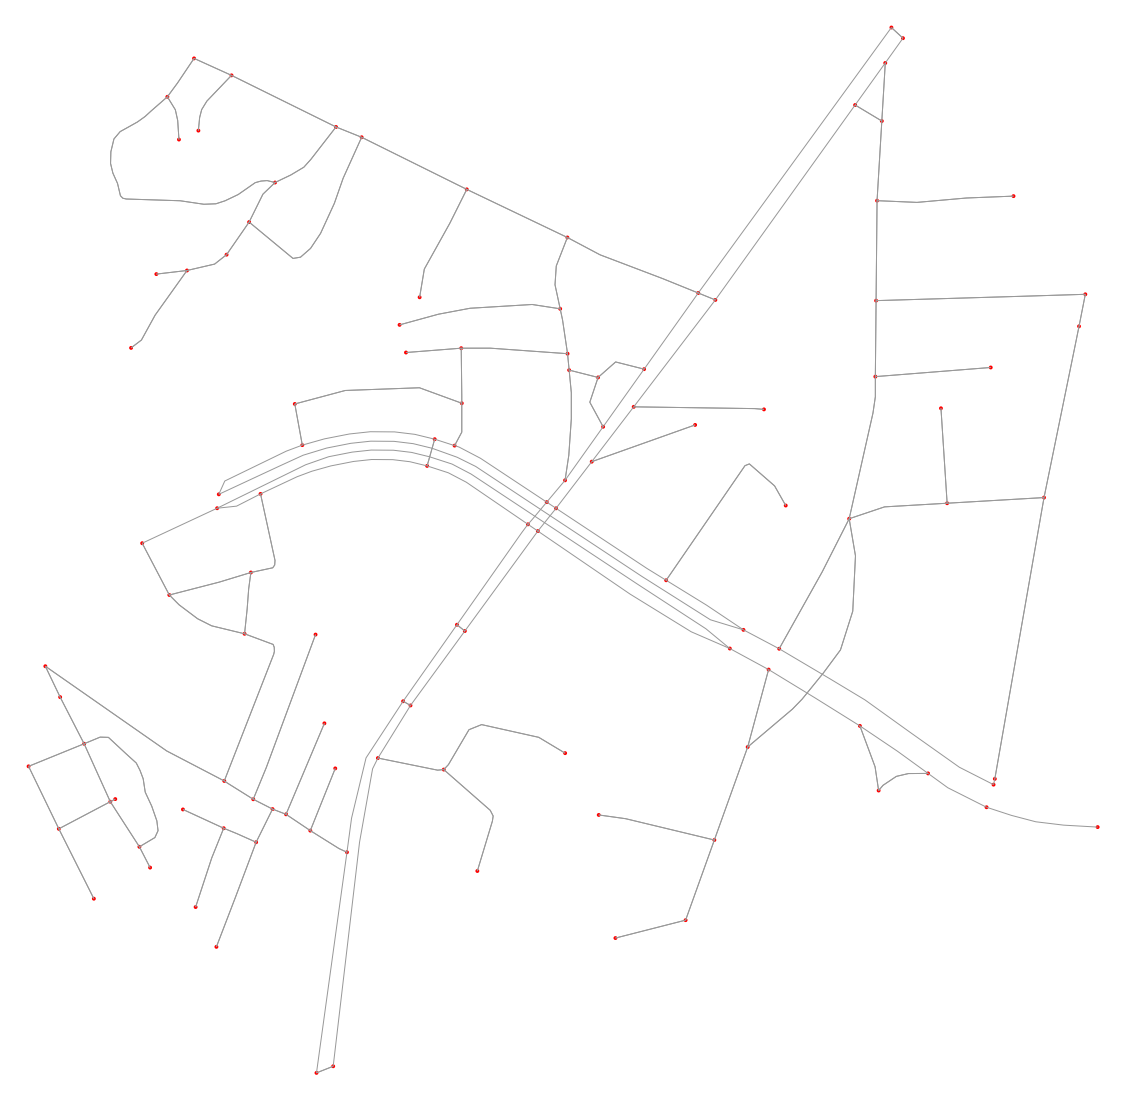

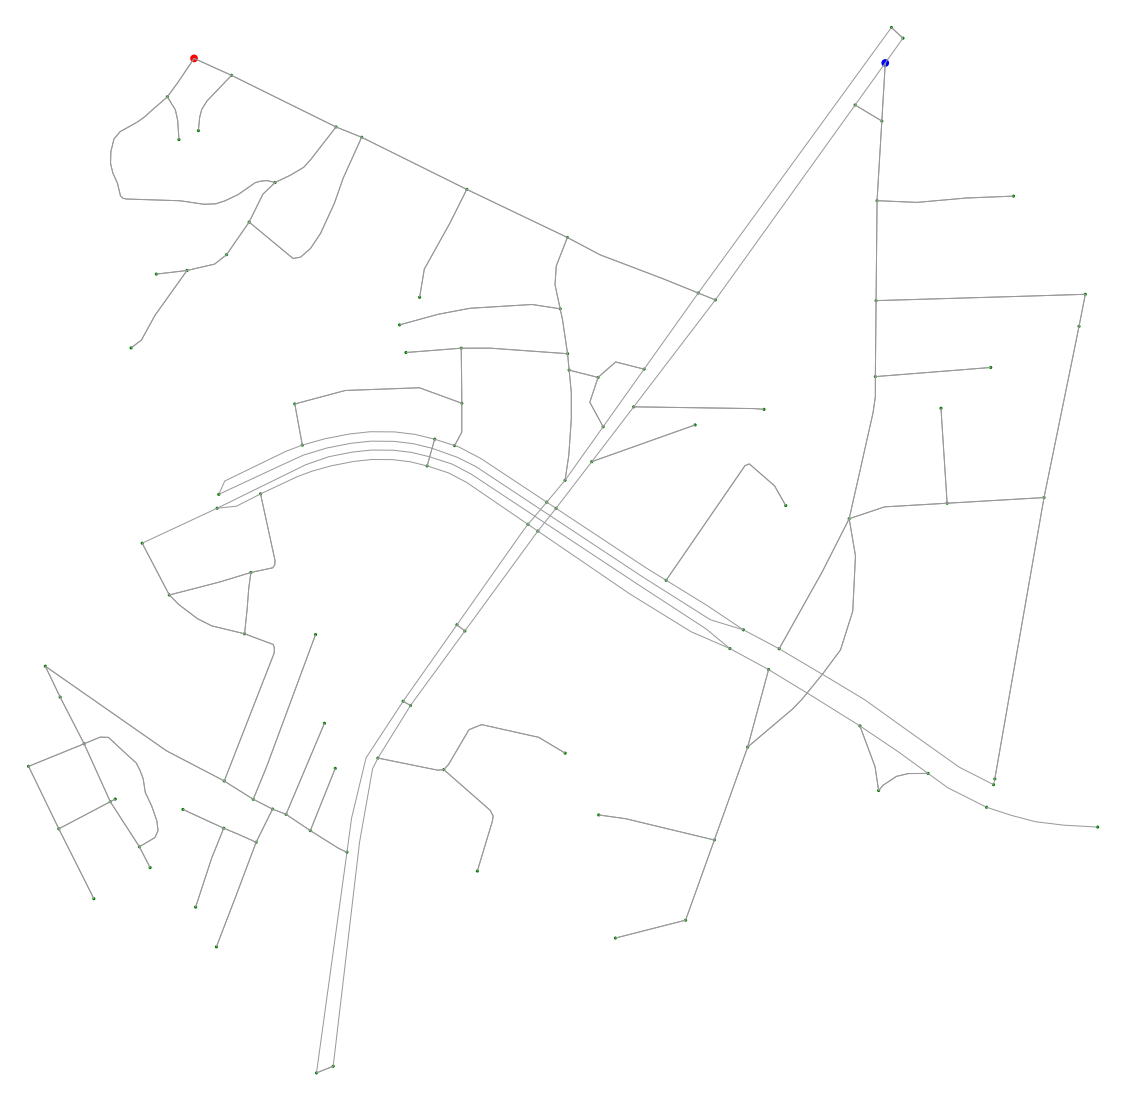

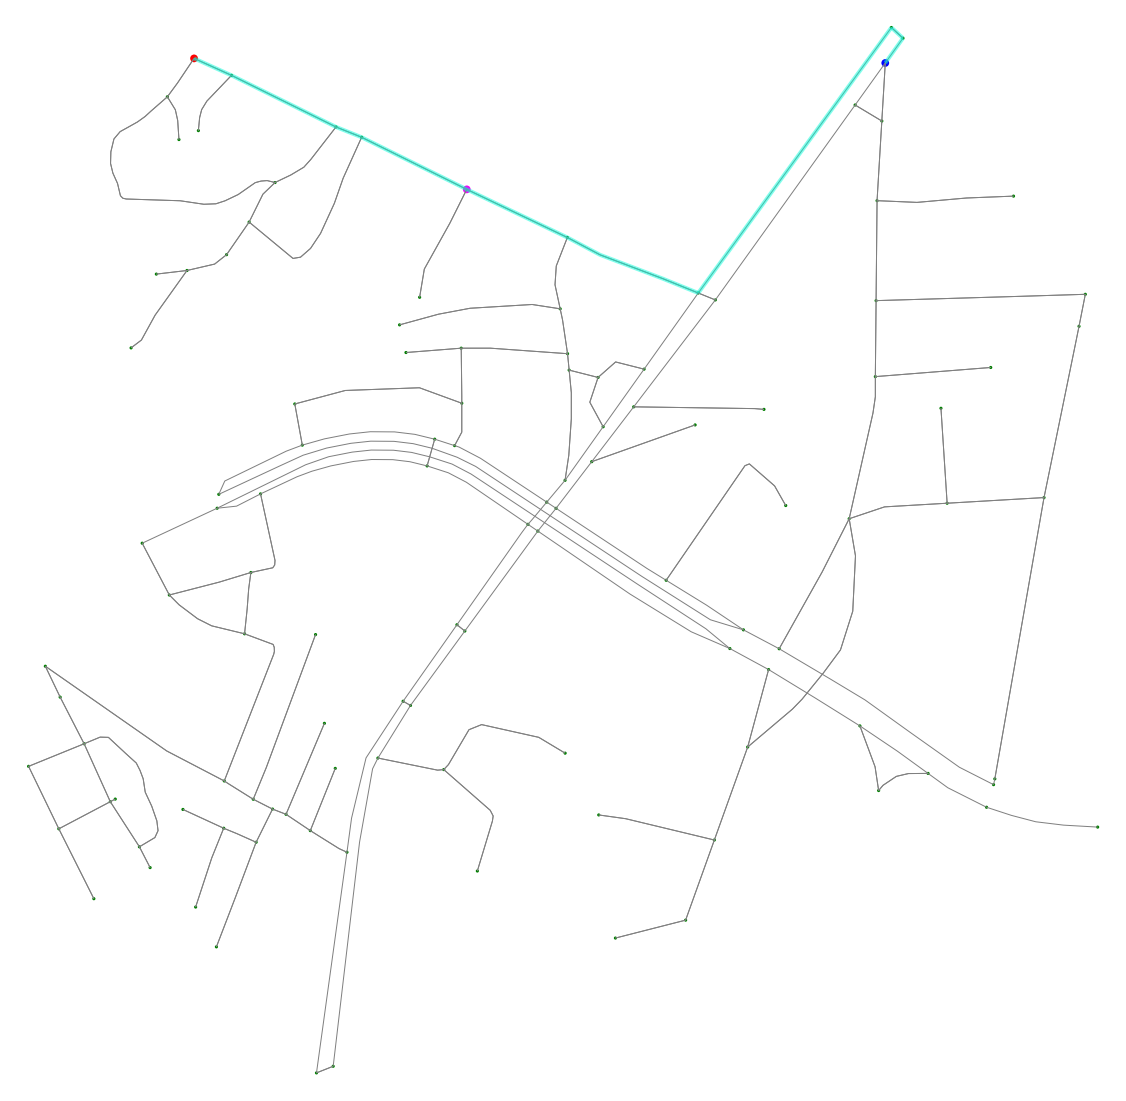

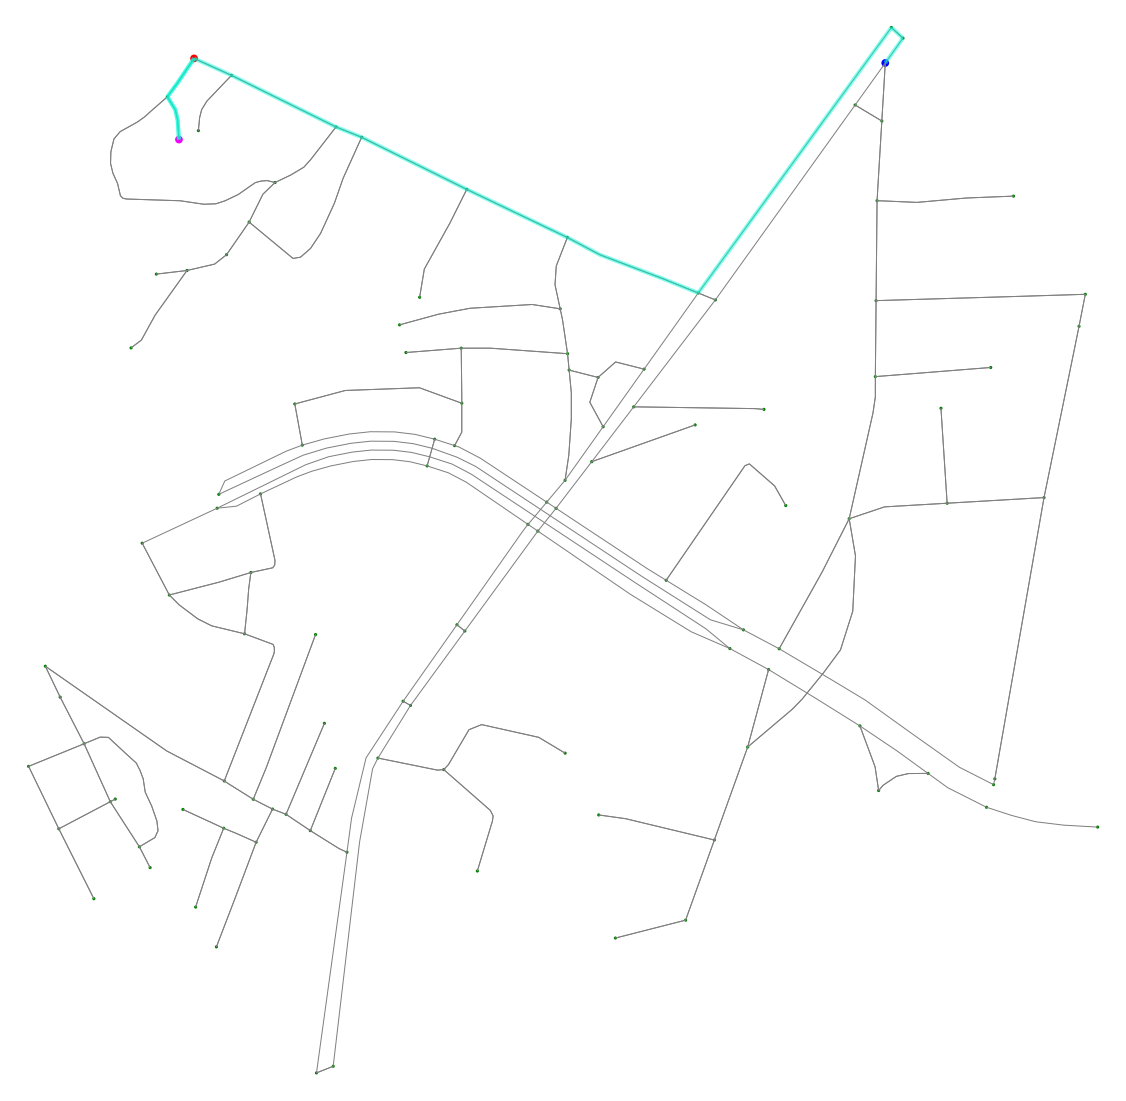

In [9]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium

graph=ox.graph_from_point(loc, distance=dis,network_type='drive')
ox.plot_graph(graph,node_color='r', fig_height=20, fig_width=20)
graph_proj = ox.project_graph(graph)
nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
node,edge=ox.graph_to_gdfs(graph, nodes=True, edges=True)
#print(nodes.head())
#print(type(nodes))
B=pd.Series.tolist(nodes.osmid)
C1=pd.Series.tolist(node.y)
D1=pd.Series.tolist(node.x)
#print(len(graph))
#print(B)

file=open('output.txt','r+')
file2=open('output2.txt','r+')
file3=open('output3.txt','r+');
Lines = file.readlines() 
lis=[]
count = 0
for line in Lines:
    lis.append(line.strip()) 

Lines2=file2.readlines()
lis2=[]

for line in Lines2:
    lis2.append(line.strip())
    
Lines3=file3.readlines()
lis3=[]
for line in Lines3:
    lis3.append(line.strip())
    


#print(lis2)

l1=lis[0].split(" ")
nc=['r' if (node==B[int(l1[0])])  else 'b' if (node==B[int(l1[len(l1)-1])]) else 'g' for node in B]
ns=[60 if (node==B[int(l1[0])] or node==B[int(l1[len(l1)-1])]) else 10 for node in B]
ox.plot_graph(graph,node_color=nc,node_size=ns,fig_height=20, fig_width=20)

for i in range (1,len(lis)):
    l1=lis[i].split(" ")
    route=[]
    cs=[]
    for j in l1:
        if int(j)<0:
            cs.append(-int(j))
            route.append(B[-int(j)])
        else:
            route.append(B[int(j)])
    #print(route)
    #print(cs)
    nc=['r' if (node==route[0])  else 'b' if (node==route[len(route)-1]) else 'g' for node in B]
    for j in cs:
        nc[j]='#F004FB'
    ns=[60 if (node==route[0] or node==route[len(route)-1]) else 10 for node in B]
    for j in cs:
        ns[j]=60
    fig, ax = ox.plot_graph_route(graph, route, fig_height=20, 
                                  fig_width=20, 
                                  show=False, close=False, 
                                  edge_color='grey',
                                  orig_dest_node_alpha=0,
                                  route_color='#04FBD8',
                                  node_color=nc,node_size=ns)
    if len(lis2)!=0 :
        tmplis=lis2[i-1].split(" ")
    tmplis2=lis3[i-1].split(" ")
    m1 = ox.plot_route_folium(graph, route, route_color='blue')
    for j in range (0,len(route)):
        b=route[j]
        if b in B:
            a=B.index(b)
            k=str(a)
            o=(C1[a],D1[a])
            #print(o)
            folium.Marker(location=o,popup=k,icon=folium.Icon(color='black'), tooltip='Click Me!').add_to(m1)
    
    b=route[0]
    a=B.index(b)
    k=str(a)
    o=(C1[a],D1[a])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='blue'), tooltip='Click Me!').add_to(m1)
    
    b=route[len(route)-1]
    a=B.index(b)
    k=str(a)
    k+='\n Travel time : '
    k+=str(tmplis2[0])
    k+='hrs \n'
    k+='\n Total dist : '
    k+=str(tmplis2[1])
    k+='M \n'
    o=(C1[a],D1[a])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='green'), tooltip='Click Me!').add_to(m1)
    
    for j in range (0,len(cs)):
        k=cs[j]
        k1=str(cs[j])
        k1+='\n Minimum Charging : '
        k1+=str(tmplis[j])
        o=(C1[k],D1[k])
        #print(o)
        folium.Marker(location=o,popup=k1,icon=folium.Icon(color='red'), tooltip='Click Me!').add_to(m1)
    ja=str(i);
    ja+=".html"
    m1.save(ja)